<a href="https://colab.research.google.com/github/Nilesh-Thamke17/Deep-Learning-Lab/blob/main/Practical_No3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, 2]  # BMI feature (single predictor)
y = diabetes.target

X = X.reshape(-1, 1)

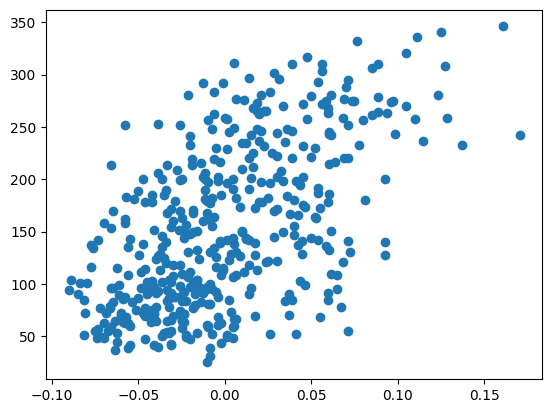

In [30]:
plt.scatter(X,y)

In [31]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Standardize features (important for gradient descent convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

In [33]:
learning_rate = 0.1
n_iterations = 1000
m = len(y_train)

In [34]:

# Initialize theta (parameters)
theta = np.zeros(2)  # [theta_0, theta_1]

In [35]:
# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

In [36]:
# Batch Gradient Descent
cost_history = []

In [37]:
# Add intercept term to X_train_scaled
X_train_b = np.c_[np.ones((m, 1)), X_train_scaled]

for iteration in range(n_iterations):
    predictions = X_train_b.dot(theta)
    errors = predictions - y_train
    gradients = (1/m) * X_train_b.T.dot(errors)
    theta = theta - learning_rate * gradients
    cost = compute_cost(X_train_b, y_train, theta)
    cost_history.append(cost)

In [38]:
# Print learned parameters from Gradient Descent
print(f"Parameters from Gradient Descent: θ₀ = {theta[0]:.4f}, θ₁ = {theta[1]:.4f}")

Parameters from Gradient Descent: θ₀ = 153.7365, θ₁ = 47.1411


In [41]:
# Add intercept term to X_test_scaled
X_test_b = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]

# Evaluate model on test set
y_test_pred = X_test_b.dot(theta)
test_mse = np.mean((y_test_pred - y_test) ** 2)
print(f"Test MSE (Gradient Descent): {test_mse:.4f}")

# Closed-form solution (Normal Equation)
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print(f"Parameters from Normal Equation: θ₀ = {theta_best[0]:.4f}, θ₁ = {theta_best[1]:.4f}")


Test MSE (Gradient Descent): 4061.8259
Parameters from Normal Equation: θ₀ = 153.7365, θ₁ = 47.1411


In [27]:
# Evaluate normal equation model on test set
y_test_pred_norm = X_test_b.dot(theta_best)
test_mse_norm = np.mean((y_test_pred_norm - y_test) ** 2)
print(f"Test MSE (Normal Equation): {test_mse_norm:.4f}")

Test MSE (Normal Equation): 4061.8259


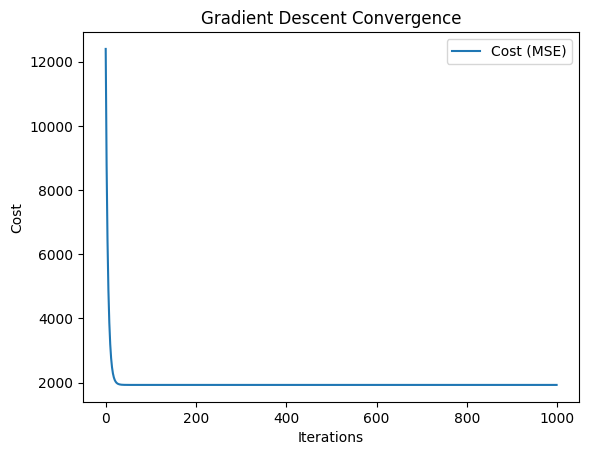

In [40]:
# Plot cost vs iterations
plt.plot(range(n_iterations), cost_history, label="Cost (MSE)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

Iteration 0: Cost 14855.6615
Iteration 1000: Cost 1927.0563
Iteration 2000: Cost 1927.0563
Iteration 3000: Cost 1927.0563
Iteration 4000: Cost 1927.0563
Iteration 5000: Cost 1927.0563
Iteration 6000: Cost 1927.0563
Iteration 7000: Cost 1927.0563
Iteration 8000: Cost 1927.0563
Iteration 9000: Cost 1927.0563
Optimized parameters: θ₀ = 153.7365, θ₁ = 47.1411
Test MSE: 4061.8259


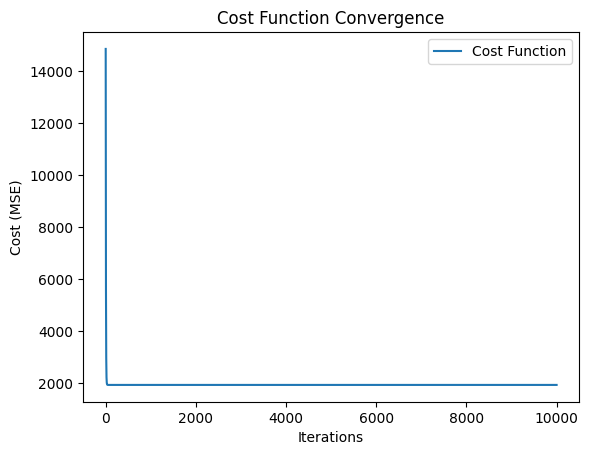

ValueError: x and y must have same first dimension, but have shapes (1000,) and (2000,)

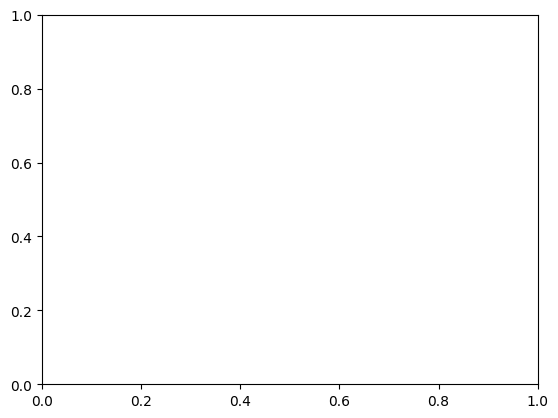

In [25]:
plt.plot(range(n_iterations), cost_history, label="Cost (MSE)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, 2]  # BMI feature (single predictor)
y = diabetes.target

# Reshape X to 2D array for consistency (n_samples, 1)
X = X.reshape(-1, 1)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for gradient descent convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add intercept term (column of ones) to feature matrix
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Gradient Descent parameters
learning_rate = 0.1
n_iterations = 1000
m = len(y_train)

# Initialize theta (parameters)
theta = np.zeros(2)  # [theta_0, theta_1]

# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

# Batch Gradient Descent
cost_history = []

for iteration in range(n_iterations):
    predictions = X_train_b.dot(theta)
    errors = predictions - y_train
    gradients = (1/m) * X_train_b.T.dot(errors)
    theta = theta - learning_rate * gradients
    cost = compute_cost(X_train_b, y_train, theta)
    cost_history.append(cost)

# Print learned parameters from Gradient Descent
print(f"Parameters from Gradient Descent: θ₀ = {theta[0]:.4f}, θ₁ = {theta[1]:.4f}")

# Evaluate model on test set
y_test_pred = X_test_b.dot(theta)
test_mse = np.mean((y_test_pred - y_test) ** 2)
print(f"Test MSE (Gradient Descent): {test_mse:.4f}")

# Closed-form solution (Normal Equation)
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print(f"Parameters from Normal Equation: θ₀ = {theta_best[0]:.4f}, θ₁ = {theta_best[1]:.4f}")

# Evaluate normal equation model on test set
y_test_pred_norm = X_test_b.dot(theta_best)
test_mse_norm = np.mean((y_test_pred_norm - y_test) ** 2)
print(f"Test MSE (Normal Equation): {test_mse_norm:.4f}")

# Plot cost vs iterations
plt.plot(range(n_iterations), cost_history, label="Cost (MSE)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()
